In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image

import keras
from tensorflow.keras.utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [ ]:
base_skin_dir = os.path.join('..', 'Data')
print(base_skin_dir)
print(os.path)
print(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))

..\Data
<module 'ntpath' from 'c:\\Users\\dell\\AppData\\Local\\Programs\\Python\\Python310\\lib\\ntpath.py'>
..\Data\HAM10000_metadata.csv


In [ ]:

from glob import glob
print(os.path.splitext)
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

<function splitext at 0x0000016EDE593520>


In [ ]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [ ]:
print(os.path.join(base_skin_dir,'HAM10000_metadata.csv'))
df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))
# Get list of directories in train_dir

# Create label_map dictionary
# label_map = {i: label for i, label in enumerate(labels)}
# num_classes=len(label_map)
# label_map


..\Data\HAM10000_metadata.csv


In [ ]:
# Count the number of images in each class
class_counts = df['dx'].value_counts().sort_index()

# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in lesion_type_dict.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
nv              Melanocytic nevi               6705      
mel             Melanoma                       1113      
bkl             Benign keratosis-like lesions  1099      
bcc             Basal cell carcinoma           514       
akiec           Actinic keratoses              327       
vasc            Vascular lesions               142       
df              Dermatofibroma                 115       
------------------------------------------------------------
Total                                         10015     


In [ ]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

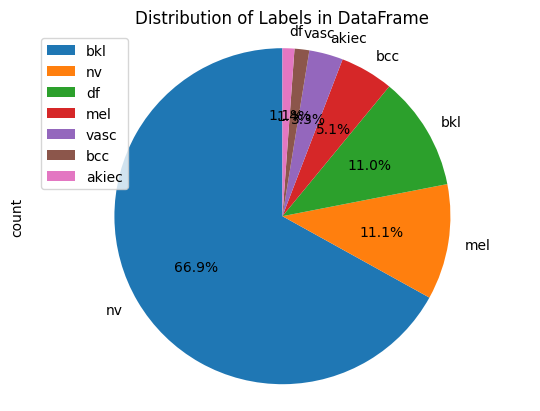

In [ ]:
# Plot pie chart of train_df
df['dx'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Labels in DataFrame')
plt.legend(df['dx'].unique())
plt.show()

In [ ]:
# Count the number of images in each class
class_counts = df['dx'].value_counts().sort_index()

# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in lesion_type_dict.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
nv              Melanocytic nevi               6705      
mel             Melanoma                       1113      
bkl             Benign keratosis-like lesions  1099      
bcc             Basal cell carcinoma           514       
akiec           Actinic keratoses              327       
vasc            Vascular lesions               142       
df              Dermatofibroma                 115       
------------------------------------------------------------
Total                                         10015     


In [ ]:
max_images_per_class = 3500

# Group by label column and take first max_images_per_class rows for each group
df = df.groupby("dx").apply(lambda x: x.head(max_images_per_class)).reset_index(drop=True)

In [ ]:
import tensorflow as tf

# Allow gpu usage
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth = True
except Exception as ex:
    print(e)

[]


In [ ]:
import multiprocessing

# Get the number of CPU cores available
max_workers = multiprocessing.cpu_count()
max_workers

8

In [ ]:

df['path'] = df['image_id'].map(imageid_path_dict.get) #Image Local Path
df['cell_type'] = df['dx'].map(lesion_type_dict.get) #Full 'dx' name
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes #Unique code for each 'dx'
print(df)

        lesion_id      image_id     dx    dx_type   age     sex   
0     HAM_0002644  ISIC_0029417  akiec      histo  80.0  female  \
1     HAM_0006002  ISIC_0029915  akiec      histo  50.0  female   
2     HAM_0000549  ISIC_0029360  akiec      histo  70.0    male   
3     HAM_0000549  ISIC_0026152  akiec      histo  70.0    male   
4     HAM_0000673  ISIC_0029659  akiec      histo  70.0  female   
...           ...           ...    ...        ...   ...     ...   
6805  HAM_0000415  ISIC_0025680   vasc  consensus  55.0  female   
6806  HAM_0004413  ISIC_0026068   vasc  consensus  55.0  female   
6807  HAM_0004257  ISIC_0025452   vasc  consensus  55.0  female   
6808  HAM_0003829  ISIC_0026349   vasc  consensus  60.0  female   
6809  HAM_0005560  ISIC_0027269   vasc  consensus  60.0  female   

         localization                                             path   
0                neck  ..\Data\HAM10000_images_part_2\ISIC_0029417.jpg  \
1                face  ..\Data\HAM10000_images_

In [ ]:
import concurrent.futures

# Define a function to resize image arrays
def resize_image_array(image_path):
    return np.asarray(Image.open(image_path).resize((100,75)))

# Use concurrent.futures to parallelize the resizing process
with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
    # Use executor.map to apply the function to each image path in the DataFrame
    image_arrays = list(executor.map(resize_image_array, df['path'].tolist()))

# Add the resized image arrays to the DataFrame
df['image'] = image_arrays
del image_arrays

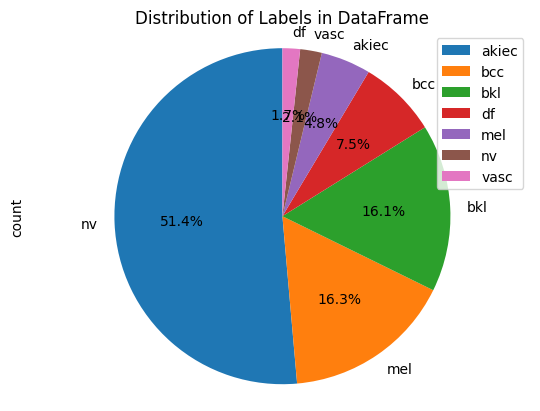

In [ ]:
# Plot pie chart of train_df
df['dx'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Labels in DataFrame')
plt.legend(df['dx'].unique())
plt.show()

In [ ]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image
0,HAM_0002644,ISIC_0029417,akiec,histo,80.0,female,neck,..\Data\Segmented_Images\ISIC_0029417.jpg,Actinic keratoses,0,"[[[15, 5, 73], [19, 5, 42], [18, 5, 46], [19, ..."
1,HAM_0006002,ISIC_0029915,akiec,histo,50.0,female,face,..\Data\Segmented_Images\ISIC_0029915.jpg,Actinic keratoses,0,"[[[7, 3, 68], [9, 2, 35], [10, 2, 37], [10, 2,..."
2,HAM_0000549,ISIC_0029360,akiec,histo,70.0,male,upper extremity,..\Data\Segmented_Images\ISIC_0029360.jpg,Actinic keratoses,0,"[[[6, 3, 68], [6, 2, 35], [6, 2, 36], [6, 2, 3..."
3,HAM_0000549,ISIC_0026152,akiec,histo,70.0,male,upper extremity,..\Data\Segmented_Images\ISIC_0026152.jpg,Actinic keratoses,0,"[[[114, 95, 179], [152, 129, 184], [154, 132, ..."
4,HAM_0000673,ISIC_0029659,akiec,histo,70.0,female,face,..\Data\Segmented_Images\ISIC_0029659.jpg,Actinic keratoses,0,"[[[88, 49, 151], [104, 46, 86], [96, 36, 75], ..."


In [ ]:
# Count the number of images in each class
class_counts = df['dx'].value_counts().sort_index()

# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in lesion_type_dict.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
nv              Melanocytic nevi               3500      
mel             Melanoma                       1113      
bkl             Benign keratosis-like lesions  1099      
bcc             Basal cell carcinoma           514       
akiec           Actinic keratoses              327       
vasc            Vascular lesions               142       
df              Dermatofibroma                 115       
------------------------------------------------------------
Total                                         6810      


In [ ]:
num_classes=len(lesion_type_dict)

In [ ]:
label_map = {'nv': 0, 'mel': 1, 'bkl': 2, 'bcc': 3, 'akiec': 4, 'vasc': 5, 'df': 6}
# Map values in 'dx' column to integer labels using the dictionary
df['label'] = df['dx'].map(label_map)

In [ ]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image,label
0,HAM_0002644,ISIC_0029417,akiec,histo,80.0,female,neck,..\Data\HAM10000_images_part_2\ISIC_0029417.jpg,Actinic keratoses,0,"[[[30, 15, 19], [32, 16, 21], [32, 16, 21], [3...",4
1,HAM_0006002,ISIC_0029915,akiec,histo,50.0,female,face,..\Data\HAM10000_images_part_2\ISIC_0029915.jpg,Actinic keratoses,0,"[[[28, 14, 14], [31, 15, 15], [35, 19, 19], [4...",4
2,HAM_0000549,ISIC_0029360,akiec,histo,70.0,male,upper extremity,..\Data\HAM10000_images_part_2\ISIC_0029360.jpg,Actinic keratoses,0,"[[[17, 7, 12], [20, 9, 12], [21, 10, 14], [29,...",4
3,HAM_0000549,ISIC_0026152,akiec,histo,70.0,male,upper extremity,..\Data\HAM10000_images_part_1\ISIC_0026152.jpg,Actinic keratoses,0,"[[[187, 162, 192], [191, 167, 195], [193, 167,...",4
4,HAM_0000673,ISIC_0029659,akiec,histo,70.0,female,face,..\Data\HAM10000_images_part_2\ISIC_0029659.jpg,Actinic keratoses,0,"[[[194, 129, 131], [189, 121, 120], [186, 118,...",4


In [ ]:
unique_labels = df['label'].unique()
print(unique_labels)


[4 3 2 6 1 0 5]


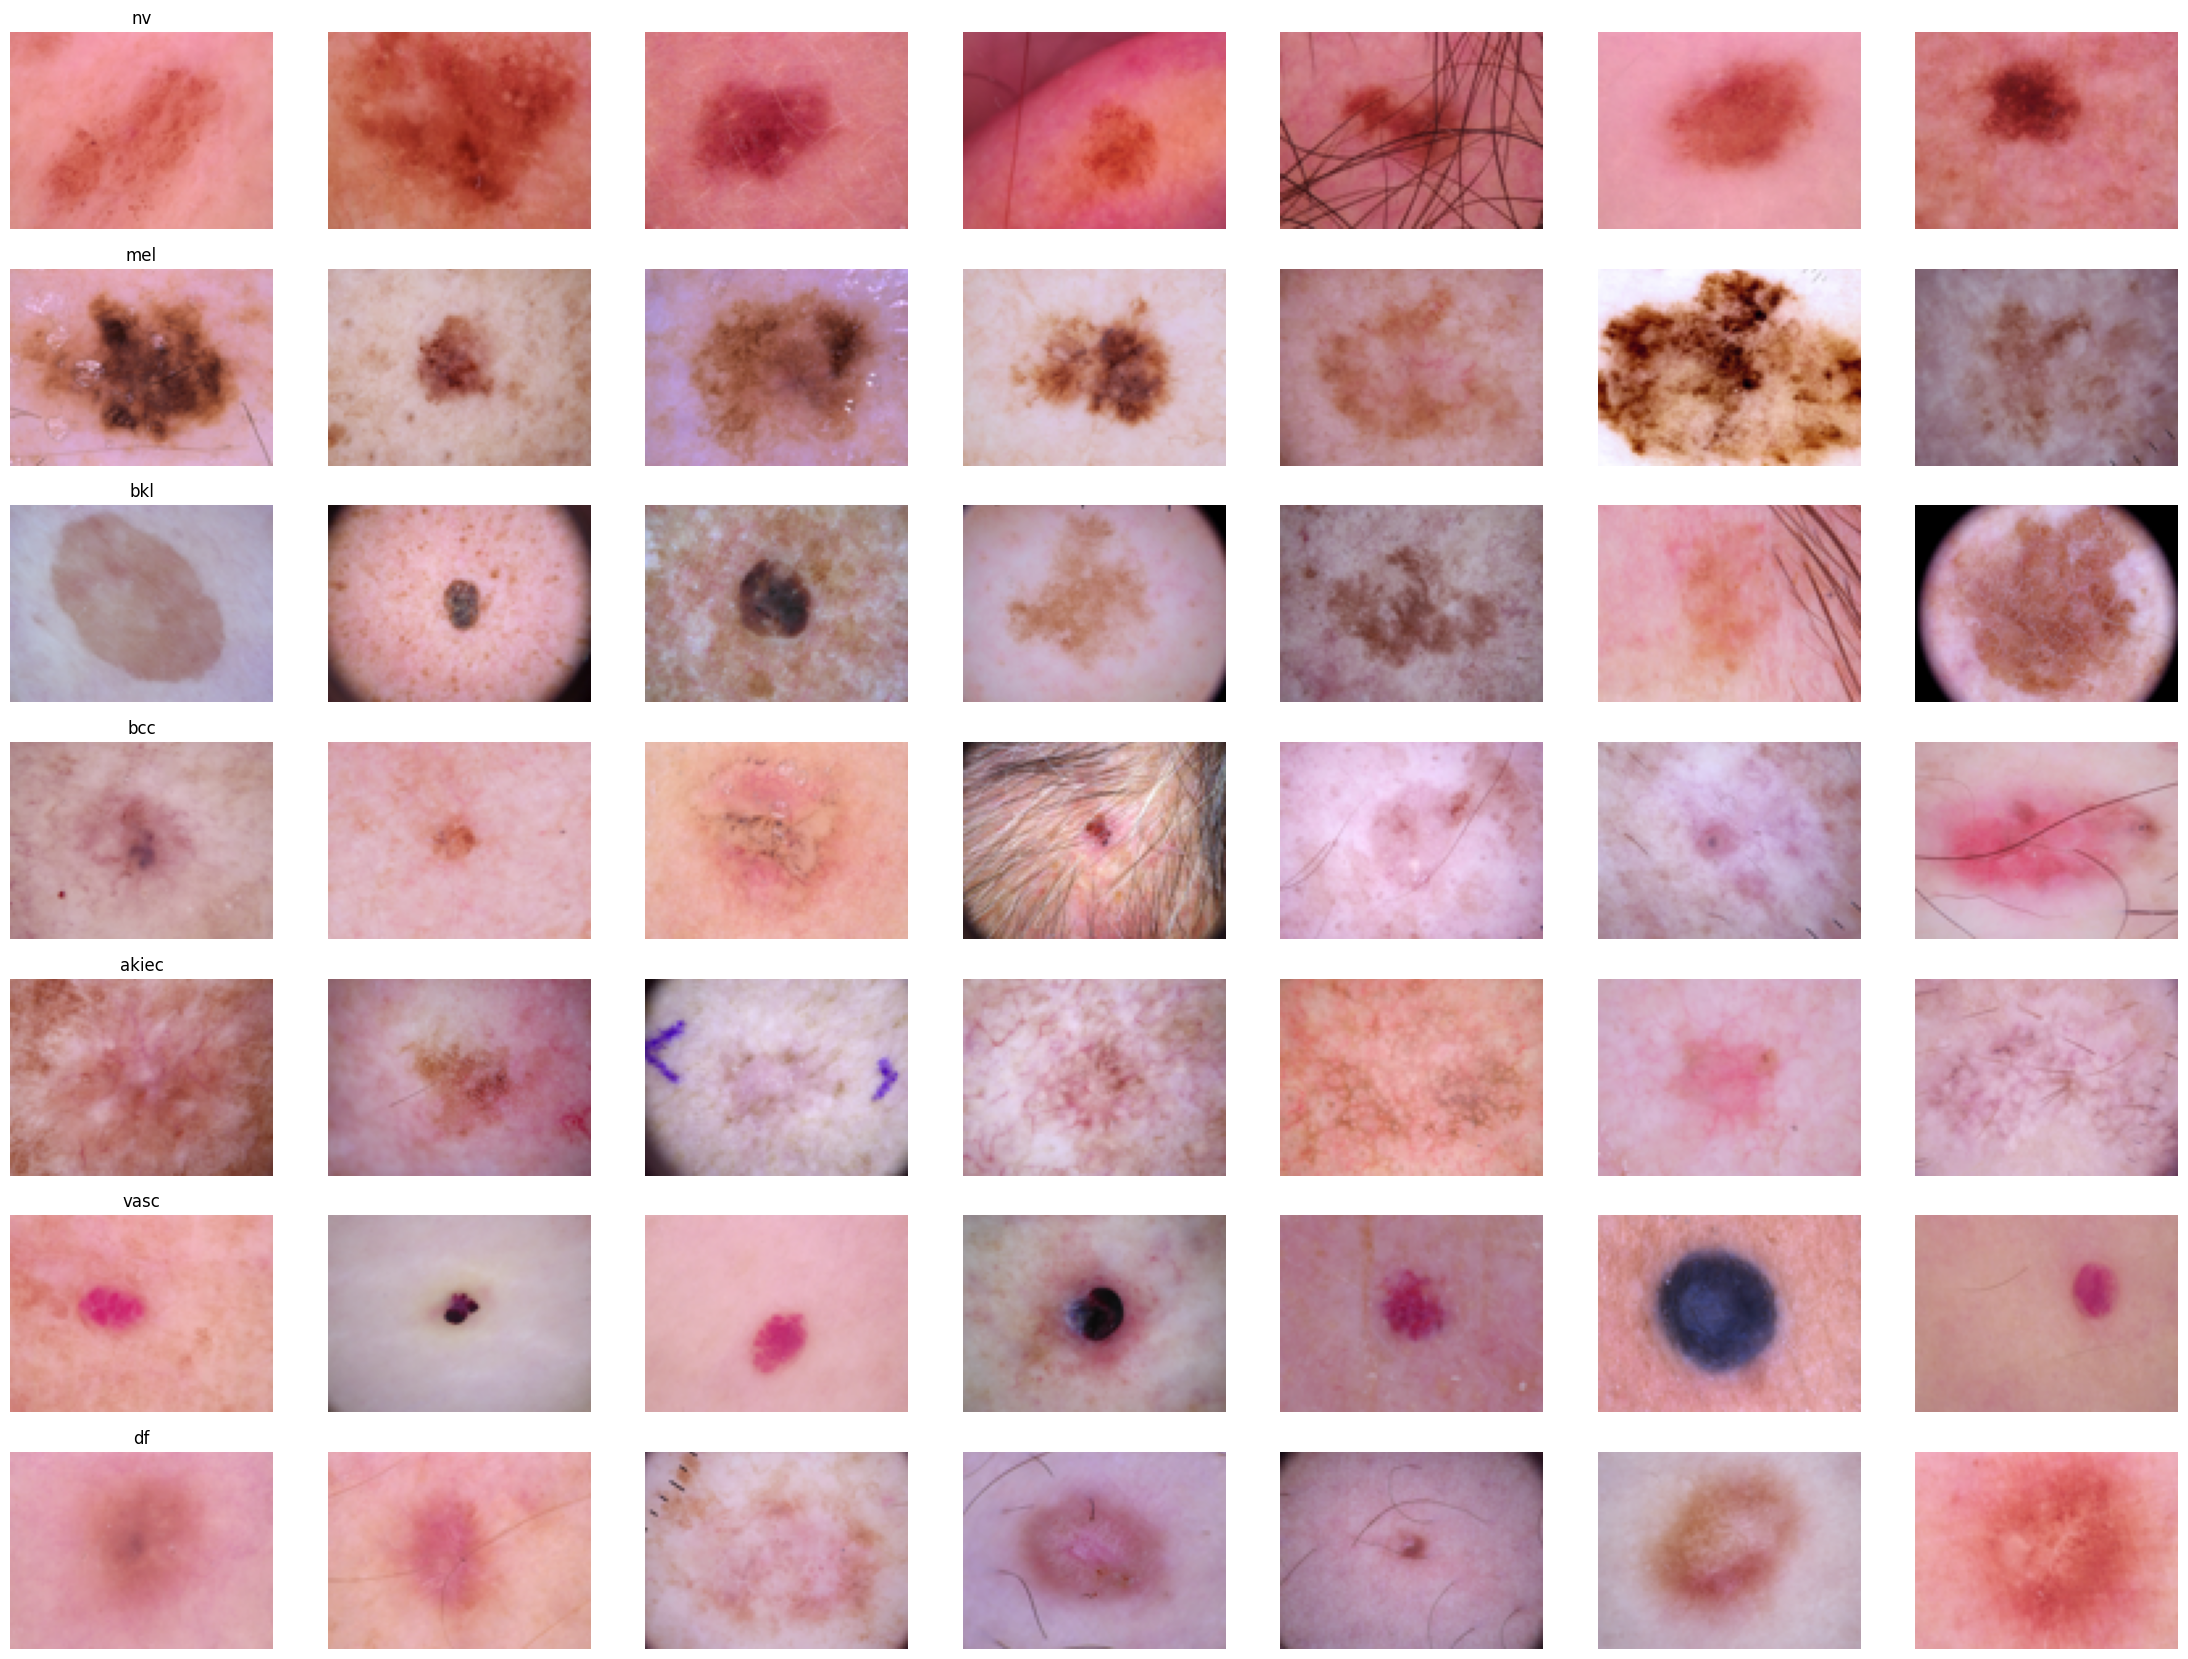

In [ ]:
# Reverse the label_map dictionary to map integer labels to class names
lesion_type_dict = {v: k for k, v in label_map.items()}

# Plotting code
n_samples = 7
fig, m_axs = plt.subplots(num_classes, n_samples, figsize=(4*n_samples, 3*7))
for n_axs, (class_idx, class_rows) in zip(m_axs, df.sort_values(['label']).groupby('label')):
    class_name = lesion_type_dict[class_idx] # get the class name using lesion_type_dict
    n_axs[0].set_title(class_name)
    for c_ax, (_, c_row) in zip(n_axs, class_rows.sample(n_samples, random_state=5).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')


In [ ]:
print(df.head())
df['image'].map(lambda x: x.shape).value_counts()

     lesion_id      image_id     dx dx_type   age     sex     localization   
0  HAM_0002644  ISIC_0029417  akiec   histo  80.0  female             neck  \
1  HAM_0006002  ISIC_0029915  akiec   histo  50.0  female             face   
2  HAM_0000549  ISIC_0029360  akiec   histo  70.0    male  upper extremity   
3  HAM_0000549  ISIC_0026152  akiec   histo  70.0    male  upper extremity   
4  HAM_0000673  ISIC_0029659  akiec   histo  70.0  female             face   

                                              path          cell_type   
0  ..\Data\HAM10000_images_part_2\ISIC_0029417.jpg  Actinic keratoses  \
1  ..\Data\HAM10000_images_part_2\ISIC_0029915.jpg  Actinic keratoses   
2  ..\Data\HAM10000_images_part_2\ISIC_0029360.jpg  Actinic keratoses   
3  ..\Data\HAM10000_images_part_1\ISIC_0026152.jpg  Actinic keratoses   
4  ..\Data\HAM10000_images_part_2\ISIC_0029659.jpg  Actinic keratoses   

   cell_type_idx                                              image  label  
0              

image
(75, 100, 3)    6810
Name: count, dtype: int64

In [ ]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image,label
0,HAM_0002644,ISIC_0029417,akiec,histo,80.0,female,neck,..\Data\HAM10000_images_part_2\ISIC_0029417.jpg,Actinic keratoses,0,"[[[30, 15, 19], [32, 16, 21], [32, 16, 21], [3...",4
1,HAM_0006002,ISIC_0029915,akiec,histo,50.0,female,face,..\Data\HAM10000_images_part_2\ISIC_0029915.jpg,Actinic keratoses,0,"[[[28, 14, 14], [31, 15, 15], [35, 19, 19], [4...",4
2,HAM_0000549,ISIC_0029360,akiec,histo,70.0,male,upper extremity,..\Data\HAM10000_images_part_2\ISIC_0029360.jpg,Actinic keratoses,0,"[[[17, 7, 12], [20, 9, 12], [21, 10, 14], [29,...",4
3,HAM_0000549,ISIC_0026152,akiec,histo,70.0,male,upper extremity,..\Data\HAM10000_images_part_1\ISIC_0026152.jpg,Actinic keratoses,0,"[[[187, 162, 192], [191, 167, 195], [193, 167,...",4
4,HAM_0000673,ISIC_0029659,akiec,histo,70.0,female,face,..\Data\HAM10000_images_part_2\ISIC_0029659.jpg,Actinic keratoses,0,"[[[194, 129, 131], [189, 121, 120], [186, 118,...",4


### SMOTE Method for oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import numpy as np

# Generate synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1,
                           flip_y=0, n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after resampling
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 900, 1: 900}


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import ImageDataGenerator

# # Create an ImageDataGenerator object with the desired transformations
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest')
# Create an ImageDataGenerator object with the desired transformations
datagen = ImageDataGenerator(featurewise_center=False, 
                            samplewise_center=False, 
                            featurewise_std_normalization=False, 
                            samplewise_std_normalization=False, 
                            zca_whitening=False, 
                            zca_epsilon=1e-06, 
                            rotation_range=20, 
                            width_shift_range=0.2, 
                            height_shift_range=0.2, 
                            brightness_range=None, 
                            shear_range=0.1, 
                            zoom_range=0.1, 
                            channel_shift_range=0.1, 
                            fill_mode='nearest', 
                            cval=0.0, 
                            horizontal_flip=False, 
                            vertical_flip=False, 
                            rescale=None, 
                            preprocessing_function=None, 
                            data_format='channels_last', 
                            validation_split=0.0, 
                            interpolation_order=1, 
                            dtype='float32')

In [ ]:
# Create an empty dataframe to store the augmented images
augmented_df = pd.DataFrame(columns=['path', 'label', 'image'])

# Loop through each class label and generate additional images if needed
for class_label in df['label'].unique():
    # Get the image arrays for the current class
    image_arrays = df.loc[df['label'] == class_label, 'image'].values
        # Calculate the number of additional images needed for the current class
    num_images_needed = max_images_per_class - len(image_arrays)
     # Generate augmented images for the current class
    if num_images_needed > 0:
        # Select a random subset of the original images
        selected_images = np.random.choice(image_arrays, size=num_images_needed)

          # Apply transformations to the selected images and add them to the augmented dataframe
        for image_array in selected_images:
            # Reshape the image array to a 4D tensor with a batch size of 1
            image_tensor = np.expand_dims(image_array, axis=0)

            # Generate the augmented images
            augmented_images = datagen.flow(image_tensor, batch_size=1)
            # Extract the augmented image arrays and add them to the augmented dataframe
            for i in range(augmented_images.n):
                augmented_image_array = augmented_images.next()[0].astype('uint8')
                augmented_df = augmented_df._append({'path': None, 'label': class_label, 'image': augmented_image_array}, ignore_index=True)



     # Add the original images for the current class to the augmented dataframe
    original_images_df = df.loc[df['label'] == class_label, ['path', 'label', 'image']]
    augmented_df = augmented_df._append(original_images_df, ignore_index=True)

# Group the augmented dataframe by the 'label' column and filter out extra images
df = augmented_df.groupby('label').head(max_images_per_class)

del augmented_df

# Use the augmented dataframe for further processing
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Count the number of images in each class
class_counts = df['label'].value_counts().sort_index()
print(class_counts)
# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in lesion_type_dict.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

label
0    3500
1    3500
2    3500
3    3500
4    3500
5    3500
6    3500
Name: count, dtype: int64
Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
0               nv                             3500      
1               mel                            3500      
2               bkl                            3500      
3               bcc                            3500      
4               akiec                          3500      
5               vasc                           3500      
6               df                             3500      
------------------------------------------------------------
Total                                         24500     


In [ ]:
features = df.drop(columns=['label','path'],axis=1)
target = df['label']

In [ ]:
features.head()

,image
0,"[[[38, 22, 25], [39, 24, 27], [47, 30, 33], [6..."
1,"[[[208, 173, 185], [210, 175, 189], [213, 179,..."
2,"[[[165, 115, 112], [164, 114, 112], [163, 113,..."
3,"[[[154, 126, 125], [156, 127, 127], [158, 130,..."
4,"[[[241, 215, 226], [241, 215, 226], [241, 215,..."


In [ ]:
target.head()

0    1
1    5
2    4
3    1
4    5
Name: label, dtype: object

In [ ]:
print(target.shape,features.shape)

(24500,) (24500, 1)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.30,shuffle=True)

In [ ]:
x_train = np.asarray(x_train['image'].tolist())
x_test = np.asarray(x_test['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)
x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std


In [ ]:
# Perform one-hot encoding on the labels
y_train = to_categorical(y_train,num_classes = num_classes)
y_test = to_categorical(y_test,num_classes = num_classes)

In [ ]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2,shuffle=True)

In [ ]:
# Reshape image in 3 dimensions (height = 75px, width = 100px , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(75, 100, 3))
x_test = x_test.reshape(x_test.shape[0], *(75, 100, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(75, 100, 3))

In [ ]:
y_train = y_train.astype(int)
y_validate = y_validate.astype(int)

In [ ]:
# Calculate the number of images in each class for train, validation, and test datasets
train_counts = np.sum(y_train, axis=0)
val_counts = np.sum(y_validate, axis=0)
test_counts = np.sum(y_test, axis=0)

# Print the number of images in each class for train, validation, and test datasets
print("Dataset Summary")
print("-" * 90)
print(f"{'Class Label':<15} {'Class Name':<30} {'Train':<10} {'Validation':<12} {'Test':<10} {'Total':<10}")
print("-" * 90)

# Iterate over each class label
for i, class_name in enumerate(label_map.values()):
    class_label = list(label_map.keys())[i]
    train_num = int(train_counts[i])
    val_num = int(val_counts[i])
    test_num = int(test_counts[i])
    total_num = train_num + val_num + test_num
    print(f"{class_label:<15} {class_name:<30} {train_num:<10} {val_num:<12} {test_num:<10} {total_num:<10}")

print("-" * 90)

# Print the total number of images
total_train = np.sum(train_counts)
total_val = np.sum(val_counts)
total_test = np.sum(test_counts)
total_images = total_train + total_val + total_test
print(f"{'Total':<46} {total_train:<10} {total_val:<12} {total_test:<10} {total_images:<10}")


Dataset Summary
------------------------------------------------------------------------------------------
Class Label     Class Name                     Train      Validation   Test       Total     
------------------------------------------------------------------------------------------
nv              0                              2232       540          728        3500      
mel             1                              2185       575          740        3500      
bkl             2                              2246       567          687        3500      
bcc             3                              2221       567          712        3500      
akiec           4                              2257       552          691        3500      
vasc            5                              2230       571          699        3500      
df              6                              2309       548          643        3500      
----------------------------------------------------------

In [ ]:
df.groupby('label').size()

label
0    3500
1    3500
2    3500
3    3500
4    3500
5    3500
6    3500
dtype: int64

In [ ]:
input_shape = df['image'][0].shape

In [119]:
input_shape = df['image'][0].shape
print(input_shape)

(75, 100, 3)


# Ensemble Model

In [ ]:
import os
from glob import glob

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding

from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import Model, Input
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.densenet import DenseNet201

from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
input_shape = x_validate[0,:,:,:].shape
print(input_shape)
model_input = Input(shape=input_shape)

(75, 100, 3)


# InceptionV3

In [ ]:
inception = InceptionV3(input_shape=input_shape, input_tensor=model_input, include_top=False, weights=None)

In [ ]:
for layer in inception.layers:
    layer.trainable = True

In [ ]:
inception_last_layer = inception.get_layer('mixed10')
print('last layer output shape:', inception_last_layer.output_shape)
inception_last_output = inception_last_layer.output

last layer output shape: (None, 1, 1, 2048)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras import layers

# Flatten the output layer to 1 dimension
x_inception = layers.GlobalMaxPooling2D()(inception_last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x_inception = layers.Dense(512, activation='relu')(x_inception)
# Add a dropout rate of 0.5
x_inception = layers.Dropout(0.5)(x_inception)
# Add a final sigmoid layer for classification
x_inception = layers.Dense(7, activation='softmax')(x_inception)

# Configure and compile the model
inception_model = Model(model_input, x_inception)

# Use the legacy optimizer to address potential performance issues on M1/M2 Macs
from tensorflow.keras.optimizers import legacy as legacy_optimizers
optimizer = legacy_optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)

inception_model.compile(loss='categorical_crossentropy',
                        optimizer=optimizer,
                        metrics=['accuracy'])


In [ ]:
inception_model.load_weights("Finetune_InceptionV3.h5")

# DenseNet

In [ ]:
dense = DenseNet201(input_shape=input_shape, input_tensor=model_input, include_top=False, weights=None)

In [ ]:
for layer in dense.layers:
    print(layer.name)
    layer.trainable = False
    
print(len(pre_trained_model.layers))

input_8
zero_padding2d_6
conv1/conv
conv1/bn
conv1/relu
zero_padding2d_7
pool1
conv2_block1_0_bn
conv2_block1_0_relu
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_concat
conv2_block2_0_bn
conv2_block2_0_relu
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_concat
conv2_block3_0_bn
conv2_block3_0_relu
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_concat
conv2_block4_0_bn
conv2_block4_0_relu
conv2_block4_1_conv
conv2_block4_1_bn
conv2_block4_1_relu
conv2_block4_2_conv
conv2_block4_concat
conv2_block5_0_bn
conv2_block5_0_relu
conv2_block5_1_conv
conv2_block5_1_bn
conv2_block5_1_relu
conv2_block5_2_conv
conv2_block5_concat
conv2_block6_0_bn
conv2_block6_0_relu
conv2_block6_1_conv
conv2_block6_1_bn
conv2_block6_1_relu
conv2_block6_2_conv
conv2_block6_concat
pool2_bn
pool2_relu
pool2_conv
pool2_pool
conv3_block1_0_bn
conv3_block1_0_relu
conv3_block1_1_conv
conv3

In [ ]:
dense_last_layer = dense.get_layer('relu')
print('last layer output shape:',dense_last_layer.output_shape)
dense_last_output = inception_last_layer.output

last layer output shape: (None, 2, 3, 1920)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras import layers

# Flatten the output layer to 1 dimension
x_dense = layers.GlobalMaxPooling2D()(dense_last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x_dense = layers.Dense(512, activation='relu')(x_dense)
# Add a dropout rate of 0.5
x_dense = layers.Dropout(0.5)(x_dense)
# Add a final sigmoid layer for classification
x_dense = layers.Dense(7, activation='softmax')(x_dense)

# Configure and compile the model
dense_model = Model(model_input, x_dense)

# Use the legacy optimizer to address potential performance issues on M1/M2 Macs
from tensorflow.keras.optimizers import legacy as legacy_optimizers
optimizer = legacy_optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)

dense_model.compile(loss='categorical_crossentropy',
                    optimizer=optimizer,
                    metrics=['accuracy'])


In [ ]:
dense_model.load_weights("Data/Densenet.h5")

# VGG16

In [ ]:
vgg = VGG16(input_shape=input_shape, input_tensor=model_input, include_top=False, weights=None)

In [ ]:
for layer in vgg.layers:
    # print(layer)
    layer.trainable = True

In [ ]:
last_layer = vgg.get_layer('block5_pool')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 2, 3, 512)


In [ ]:
from tensorflow.keras.optimizers import legacy as legacy_optimizers
from tensorflow.keras.models import Model
from tensorflow.keras import layers

# Flatten the output layer to 1 dimension
x_vgg = layers.GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x_vgg = layers.Dense(512, activation='relu')(x_vgg)
# Add a dropout rate of 0.5
x_vgg = layers.Dropout(0.5)(x_vgg)
# Add a final sigmoid layer for classification
x_vgg = layers.Dense(7, activation='softmax')(x_vgg)

# Configure and compile the model
vgg_model = Model(model_input, x_vgg)

# Use the legacy optimizer to address potential performance issues on M1/M2 Macs
optimizer = legacy_optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)

vgg_model.compile(loss='categorical_crossentropy',
                        optimizer=optimizer,
                        metrics=['accuracy'])


In [ ]:
vgg_model.load_weights("Finetune_VGG16.h5")

In [ ]:
inception_model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 75, 100, 3)]      0         
                                                                 
 block1_conv1 (Conv2D)       (None, 75, 100, 64)       1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 75, 100, 64)       36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 37, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 37, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 37, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 18, 25, 128)       0  

In [ ]:
def ensemble(models, model_input):
    outputs = [model.outputs[0] for model in models]
    y = layers.Average()(outputs)
    model = Model(model_input, y, name='ensemble')
    return model

In [ ]:
inception_model = load_model("Finetune_InceptionV3.h5")
vgg_model=load_model("Finetune_VGG16.h5")
dense_model=load_model("Finetune_Densenet.h5")

In [ ]:
ensemble_model = ensemble([dense_model,inception_model,vgg_model], model_input)

In [ ]:
from PIL import Image
import numpy as np
import keras

def preprocess_image(image_path):
    image = Image.open(image_path).resize((100, 75))
    image_array = np.array(image, dtype=np.float32) - 162.57063208888889
    image_array /= 41.96703347421026
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

def predict_image(image_path, model):
    # Preprocess the image
    image_array = preprocess_image(image_path)

    # Perform prediction
    prediction = model.predict(image_array)
    predicted_class = np.argmax(prediction)

    return predicted_class

model1 = keras.models.load_model("oranos-on-the-beat.h5")

image_path = '/content/drive/MyDrive/ISIC Original Data/Train/nevus/ISIC_0000023.jpg'

predicted_class = predict_image(image_path, model1)

print(f"Predicted class: {predicted_class}")


# 0               actinic keratosis
# 1               melanoma
# 2               basal cell carcinoma
# 3               pigmented benign keratosis
# 4               squamous cell carcinoma
# 5               vascular lesion
# 6               nevus


1/1 [==============================] - 3s 3s/step
Predicted class: 6


In [ ]:
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------
#---------------------------------------        Done         ------------------------------------------
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------

In [ ]:
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------
#---------------------------------------        Done         ------------------------------------------
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------

In [ ]:
# from PIL import Image
# image='/content/drive/MyDrive/ISIC Original Data/Train/actinic keratosis/ISIC_0025780.jpg'
# model1 = keras.models.load_model("skinDiseaseDetectionUsningCNN.h5")
# pre_img = (np.array(Image.open(image).resize((100, 75)), dtype= np.float32) -162.57063208888889)/ 41.96703347421026

In [ ]:
# pre_img.shape = (1,75, 100, 3)
# model1.predict(pre_img).argmax()

1/1 [==============================] - 4s 4s/step


0

In [ ]:
# print(x_test_mean, "   ", x_test_std)
# 162.57063208888889     41.96703347421026
# x_test = x_test.reshape(x_test.shape[0], *(75, 100, 3))

# from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess_input
# from tensorflow.keras.applications import DenseNet201
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten, Dropout

# # DenseNet201
# model = Sequential()
# model.add(DenseNet201(include_top=False, weights='imagenet', input_shape=input_shape))
# model.add(Flatten())
# model.add(Dropout(0.5))  # Add a Dropout layer with a dropout rate of 0.5
# model.add(Dense(512, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

# model.summary()